In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\Acer\\Desktop\\DATA.csv')

In [4]:
df = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D8DCC54A8>,
      dtype=object)

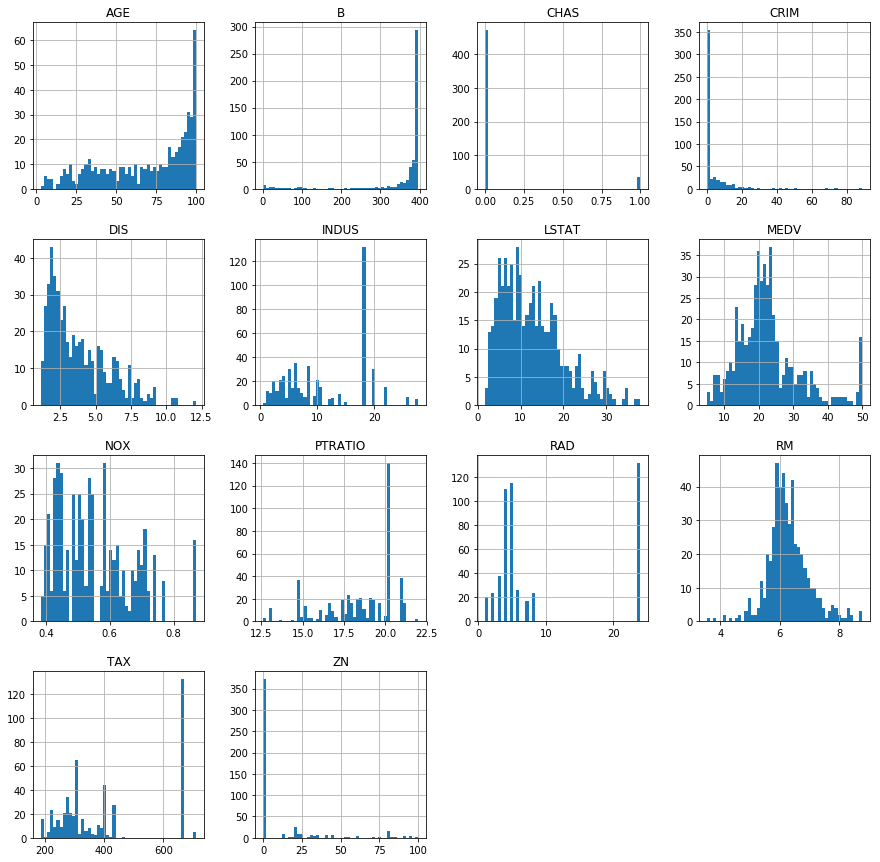

In [11]:
df.hist(bins=50,figsize=(15,15))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set,test_set=train_test_split(df,test_size=0.3,random_state=5)

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
train_set['CHAS'].value_counts()

0    333
1     21
Name: CHAS, dtype: int64

In [16]:
test_set['CHAS'].value_counts()

0    138
1     14
Name: CHAS, dtype: int64

In [17]:
#stratified sampling

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit


In [19]:
for train_index,test_index in StratifiedShuffleSplit(n_splits=1,random_state=4,test_size=.3).split(df,df['CHAS']):
    new_train_df = df.loc[train_index]
    new_test_df = df.loc[test_index]

In [20]:
new_train_df['CHAS'].value_counts()

0    330
1     24
Name: CHAS, dtype: int64

In [21]:
new_test_df['CHAS'].value_counts()

0    141
1     11
Name: CHAS, dtype: int64

In [22]:
import seaborn as sns

In [23]:
corr_matrix = df.corr()

In [24]:
corr_matrix.sort_values(by='MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929


In [25]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D912E7048>,
      dtype=object)

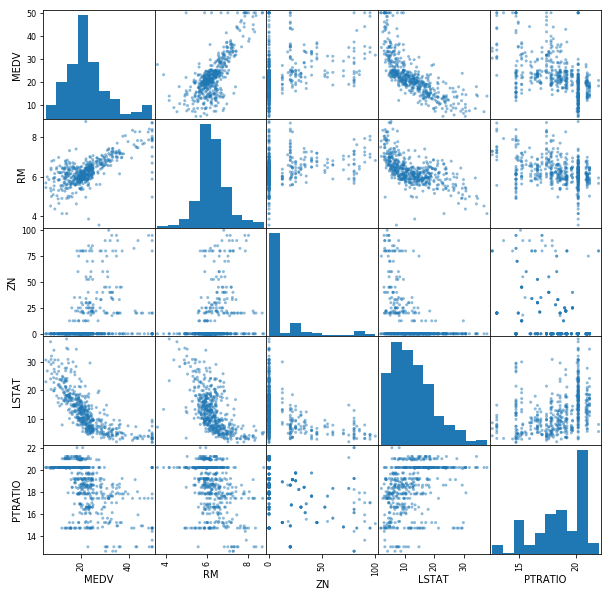

In [26]:
scatter_matrix(df[['MEDV','RM','ZN','LSTAT','PTRATIO']],figsize=(10,10))

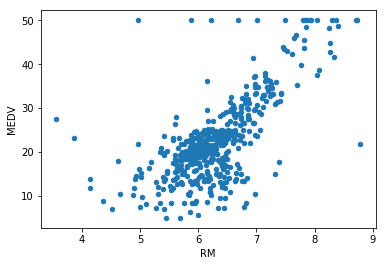

In [27]:
df.plot(kind='scatter',x='RM',y='MEDV')

In [28]:
corr_matrix = df.corr()
corr_matrix.sort_values(by='MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929


In [29]:
    from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [31]:
X = imputer.transform(df)

In [32]:
df_tr= pd.DataFrame(X,columns=df.columns)

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scalar',StandardScaler())
])

In [38]:
df_num_tr = pipeline.fit_transform(train_x)

In [39]:
df_num_tr.shape

(354, 13)

## selecting the model

In [40]:
train_x = new_train_df.drop('MEDV',axis='columns')
train_y = new_train_df['MEDV']

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = DecisionTreeRegressor()
#model = LinearRegression()
model.fit(train_x,train_y)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
input_data = pipeline.transform(train_x.iloc[:5])


In [43]:
input_data

array([[ 0.29082763, -0.4847262 ,  1.02298219, -0.26967994,  0.25282199,
         0.22248575,  0.22009003, -0.75353727,  1.64263553,  1.52140702,
         0.80764172, -2.69140873, -0.11404434],
       [-0.39573914,  0.48547366, -0.78517757, -0.26967994, -1.07956536,
        -0.06949493,  0.37368663,  2.01390586, -0.30675919, -0.48129594,
         0.29825447,  0.22437972, -0.37749949],
       [-0.40081519, -0.4847262 ,  2.1383095 , -0.26967994,  0.22669675,
        -0.6123736 ,  0.99505466, -0.87453699, -0.88011058, -1.32767635,
         0.29825447,  0.16327383,  1.76097152],
       [ 0.15430728, -0.4847262 ,  1.02298219,  3.70809924,  1.872587  ,
        -0.21475166,  0.52030155, -0.50666949,  1.64263553,  1.52140702,
         0.80764172,  0.42656369, -0.19111899],
       [-0.40980241, -0.4847262 , -1.22392222, -0.26967994, -0.95764756,
         1.67652022, -0.20928226, -0.14154339, -0.88011058, -0.80315891,
        -0.21113277,  0.44197118, -0.93243692]])

In [44]:
model.predict(input_data)

array([33.09, 26.86, 33.52, 34.33, 33.52])

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, df_num_tr,train_y,scoring='neg_mean_squared_error',cv = 10)

In [46]:
rmse_sqrt = np.sqrt(-score)

In [47]:
rmse_sqrt

array([3.28533019, 3.52764243, 2.62059313, 5.63461598, 3.77270725,
       3.16516486, 3.21451218, 3.50320629, 3.95845316, 3.14706666])

In [48]:
test_x = new_test_df.drop('MEDV',axis='columns')
test_y = new_test_df['MEDV'] 

In [49]:
input_data = pipeline.transform(train_x.iloc[:5])
model.predict(input_data)
score = cross_val_score(model, df_num_tr,train_y,scoring='neg_mean_squared_error',cv = 10)
rmse_sqrt = np.sqrt(-score)
rmse_sqrt

array([3.291143  , 2.76518083, 2.66002141, 4.56547886, 3.61646987,
       3.72609332, 3.41144377, 3.81686558, 4.36648469, 3.26620794])

In [52]:
model.predict(test_x)


array([36.52, 12.67, 18.49, 12.93, 20.49, 23.94, 29.16, 18.95, 20.41,
       25.47, 10.76, 23.33, 15.65,  9.51, 22.21, 20.99, 45.24, 23.77,
       19.58, 19.16, 22.13, 23.26, 12.69,  8.82, 25.96, 19.53, 25.12,
       20.87,  9.95, 24.81, 43.43, 23.99, 15.12, 20.94, 20.42, 15.25,
       23.11, 44.71,  7.78, 13.17, 20.45, 20.08, 22.96, 19.4 , 16.72,
       30.97, 19.89, 16.9 , 35.2 , 19.77, 43.48, 26.47, 19.93,  9.56,
       13.91, 26.86, 26.21, 27.16, 23.7 , 21.49, 15.  , 21.57, 46.19,
       21.79, 36.26, 21.93, 22.75, 16.48, 13.98, 29.56, 19.46, 29.33,
       19.43, 45.43, 15.26, 46.44, 38.36, 30.08, 22.17, 20.9 , 47.59,
       31.45, 22.01, 26.41, 14.63, 21.53, 23.32, 35.6 , 20.05, 14.4 ,
       32.86, 34.17, 23.37, 23.85, 24.61, 17.37, 29.66, 19.53, 34.83,
       22.71, 20.77, 15.72, 22.99, 32.52, 44.29, 18.37, 24.07, 24.25,
       14.67, 20.74, 31.08, 21.79, 45.32, 20.67, 18.28, 19.25, 26.  ,
       15.54, 20.18, 23.  , 26.43, 15.36, 22.81, 32.52, 16.07, 44.65,
       20.27, 19.97,

In [58]:
np.array(test_y)

array([50. , 17.1, 18.9, 13.4, 19.3, 27.5, 22. , 20.8, 24.5, 25. ,  7.2,
       23.3, 13.5, 10.8, 14.5, 20.3, 50. , 22.4, 16.8, 21.1, 25. , 23.1,
       12.5, 11. , 32.5, 19.6, 28.4, 19.7,  8.4, 25.2, 48.3, 23.1, 19.1,
       21.5, 20.6, 14.9, 24.7, 48.5,  5. ,  7. , 18.5, 19.6, 15.3, 23.3,
       13.6, 24.8, 18.5, 15.7, 34.9, 19.9, 44. , 29.4, 21.5,  7.4, 14.8,
       29.8, 25.1, 29.1, 28.1, 24.4, 15.2, 21. , 45.4, 18.9, 50. , 20.6,
       23.8, 16.7, 12.6, 31. , 21.4, 23.9, 20.4, 46. , 17.4, 50. , 25. ,
       23.7, 21.4, 19.7, 50. , 37. , 21.2, 26.6, 17.9, 20.5, 22.2, 37.3,
       22.5, 14.4, 32. , 33.8, 25. , 22.2, 24.5, 21.4, 30.3, 23.1, 33.4,
       16.5, 22.6, 17.2, 21.9, 31.5, 38.7, 20.5, 29.8, 36.2, 11.9, 20.6,
       26.6, 19.6, 21.9, 19.9, 20.1, 18.7, 29. , 19.4, 17.6, 24.1, 24.8,
       15.6, 23.2, 29.9, 15.2, 43.8, 22. , 21.2, 13.1, 19.4, 19.6, 24.4,
        7.5, 14.1, 23.9,  7.2, 33.4, 16.2, 19.6, 17.7, 22.2, 24. , 19.1,
       13.8, 23.4, 13.1, 16.2, 19.4, 12.7, 23.1, 23